In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv("Profile3.csv")

In [118]:
df

,OID_,POINT_X,POINT_Y,Profile_ID,Distance (m),Distance (km),ORIG_SEQ,B2,B3,B4,Benthos,Benthos _label,Bathymetrey
0,1,271107.0596,6132318.251,3,10,0.01,1,676.557861,1080.868652,477.568695,2,Bare Sand,-1.806635
1,2,271097.4178,6132315.599,3,20,0.02,2,604.932800,1003.399109,384.822815,2,Bare Sand,-1.881171
2,3,271087.7759,6132312.946,3,30,0.03,3,555.244568,946.633606,326.598694,2,Bare Sand,-1.955707
3,4,271078.1341,6132310.294,3,40,0.04,4,528.705200,915.185303,297.043549,2,Bare Sand,-2.060000
4,5,271068.4923,6132307.641,3,50,0.05,5,583.651245,986.583923,352.399383,2,Bare Sand,-2.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,627,265071.2812,6130657.836,3,6270,6.27,627,83.115334,47.420776,46.810093,1,Seagrass,-13.423922
627,628,265061.6394,6130655.183,3,6280,6.28,628,88.170418,46.057228,43.853642,1,Seagrass,-13.436520
628,629,265051.9976,6130652.531,3,6290,6.29,629,92.913628,53.853416,45.616344,1,Seagrass,-13.448514
629,630,265042.3557,6130649.878,3,6300,6.30,630,92.998787,68.422127,60.779556,1,Seagrass,-13.459904


In [119]:
if 'Bathymetrey ' in df.columns:
    print("Bathymetrey is in the DataFrame")
else:
    print("Bathymetrey is not in the DataFrame")


Bathymetrey is in the DataFrame


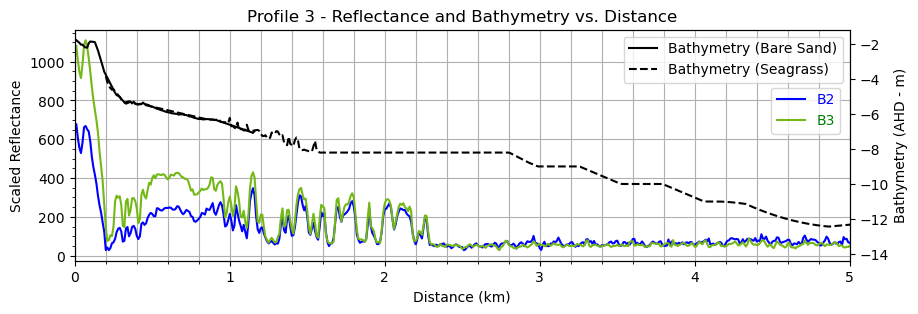

In [120]:
# Set the X-axis to Distance (km)
x = df["Distance (km)"]

# Set the primary Y-axis to the reflectance of B2 and B3
y1 = df[["B2", "B3"]]

# Set the secondary Y-axis to the bathymetry
y2 = df["Bathymetrey "]

# Create the plot with two Y-axes
fig, ax1 = plt.subplots(figsize=(10, 3))

# Set the title and axis labels
ax1.set_title("Profile 3 - Reflectance and Bathymetry vs. Distance")
ax1.set_xlabel("Distance (km)")
ax1.set_ylabel("Scaled Reflectance")
ax1.minorticks_on() # turn on minor ticks on x-axis
ax1.grid(which='both', axis='x') # add x minor gridlines
#ax1.majorticks_on() # turn on minor ticks on x-axis
ax1.grid(which='major', axis='y') # add both major and minor gridlines

# Add a secondary y-axis for the bathymetry
ax2 = ax1.twinx()
ax2.set_ylabel("Bathymetry (AHD - m)")
#ax2.minorticks_on() # turn on minor ticks on y-axis
#ax2.grid(which='both', axis='y') # add both major and minor gridlines

# Set the limits of the x-axis
ax1.set_xlim(0, 5)

# Plot the reflectance data 
for label, color in [("B2", "b"), ("B3", "#74B816")]:
    band_data = y1[label]
    ax1.plot(x, band_data, color=color, label=label)

# Plot the bathymetry data as a line plot in black color, with das based on benthic env
for benthos, linestyle, name in [(2, '-', 'Bare Sand'), (1, '--', 'Seagrass')]:
    benthos_data = y2[df['Benthos'] == benthos]
    ax2.plot(x[df['Benthos'] == benthos], benthos_data, color='black', linestyle=linestyle, label=f'Bathymetry ({name})')

# Move the legend for the reflectance lines to the upper right and adjust the location incrementally
legend1 = ax1.legend(loc='lower left', bbox_to_anchor=(0.89, 0.52), ncol=1)
for i, text in enumerate(legend1.get_texts()):
    text.set_color(["blue", "green"][i])
    text.set_position((1.01, 1.0 - (i * 0.05)))

# Move the legend for the bathymetry line to the upper left and adjust the location incrementally
legend2 = ax2.legend(loc='upper right')
for i, text in enumerate(legend2.get_texts()):
    text.set_color("black")
    text.set_position((-0.01, 1.0 - (i * 0.05)))

# Show the plot
plt.show()


In [121]:
fig.savefig("Profile_3_reflectance_plot.png", dpi=300, bbox_inches='tight')
